In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_paths = {
    'cooking': '/content/drive/MyDrive/aq_data/cooking.csv',
    'sleep': '/content/drive/MyDrive/aq_data/sleep.csv',
    'burning': '/content/drive/MyDrive/aq_data/burning.csv',
    'fresh': '/content/drive/MyDrive/aq_data/fresh.csv',
    'perfume': '/content/drive/MyDrive/aq_data/perfume.csv'
}

In [ ]:
def load_data(file_path, label):
    # Read data and split into columns
    df = pd.read_csv(file_path, header=None, names=['Combined'], quotechar='"')
    df = df['Combined'].str.split(',', expand=True)
    df.columns = ['Flammable Gases', 'NO2', 'Ethanol', 'VOC', 'CO']
    df = df.apply(pd.to_numeric, errors='coerce')
    df['Label'] = label
    df.replace(['None', 0], np.nan, inplace=True)
    df.dropna(inplace=True)
    return df


In [ ]:
cooking = load_data(file_paths['cooking'], 'cooking')
burning = load_data(file_paths['burning'], 'burning')
fresh = load_data(file_paths['fresh'], 'fresh')
perfume = load_data(file_paths['perfume'], 'perfume')
sleep= load_data(file_paths['sleep'],'sleep')

In [ ]:
cooking

,Flammable Gases,NO2,Ethanol,VOC,CO,Label
0,133,434.0,482.0,407.0,167.0,cooking
1,133,429.0,482.0,405.0,166.0,cooking
2,133,426.0,481.0,404.0,164.0,cooking
3,133,423.0,481.0,403.0,161.0,cooking
4,133,420.0,481.0,402.0,161.0,cooking
...,...,...,...,...,...,...
390,132,525.0,450.0,456.0,238.0,cooking
391,131,570.0,476.0,492.0,379.0,cooking
392,131,620.0,489.0,525.0,281.0,cooking
393,132,576.0,479.0,502.0,296.0,cooking


In [ ]:
all_data = pd.concat([cooking, burning, fresh, perfume, sleep])
sampled_data = all_data.groupby('Label').apply(lambda x: x.sample(n=350, random_state=42)).reset_index(drop=True)

<ipython-input-6-ed12f1d250c1>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = all_data.groupby('Label').apply(lambda x: x.sample(n=350, random_state=42)).reset_index(drop=True)


In [ ]:
X = sampled_data.drop(columns=['Label'])
y = sampled_data['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

models = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'SVM': SVC(probability=True),
    'Gradient Boosting': GradientBoostingClassifier()
}

In [ ]:
from joblib import dump

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['fresh' 'perfume' 'burning' 'sleep' 'cooking' 'perfume' 'sleep' 'cooking'
 'perfume' 'burning' 'perfume' 'fresh' 'sleep' 'sleep' 'cooking' 'perfume'
 'cooking' 'fresh' 'sleep' 'burning' 'fresh' 'burning' 'sleep' 'cooking'
 'sleep' 'burning' 'perfume' 'sleep' 'cooking' 'fresh' 'burning' 'sleep'
 'sleep' 'fresh' 'fresh' 'cooking' 'fresh' 'cooking' 'cooking' 'cooking'
 'perfume' 'fresh' 'sleep' 'cooking' 'cooking' 'sleep' 'perfume' 'perfume'
 'burning' 'perfume' 'sleep' 'burning' 'burning' 'burning' 'perfume'
 'fresh' 'fresh' 'burning' 'perfume' 'burning' 'cooking' 'fresh' 'burning'
 'cooking' 'cooking' 'burning' 'sleep' 'fresh' 'perfume' 'perfume'
 'perfume' 'perfume' 'sleep' 'sleep' 'cooking' 'sleep' 'sleep' 'fresh'
 'cooking' 'cooking' 'cooking' 'perfume' 'fresh' 'sleep' 'fresh' 'perfume'
 'burning' 'burning' 'perfume' 'fresh' 'perfume' 'burning' 'perfume'
 'burning' 'cooking' 'cooking' 'burning' 'perfume' 'burning' 'perfume'
 'perfume' 'burning' 'cooking' 'sleep' 'sleep' 'perfume' 'p

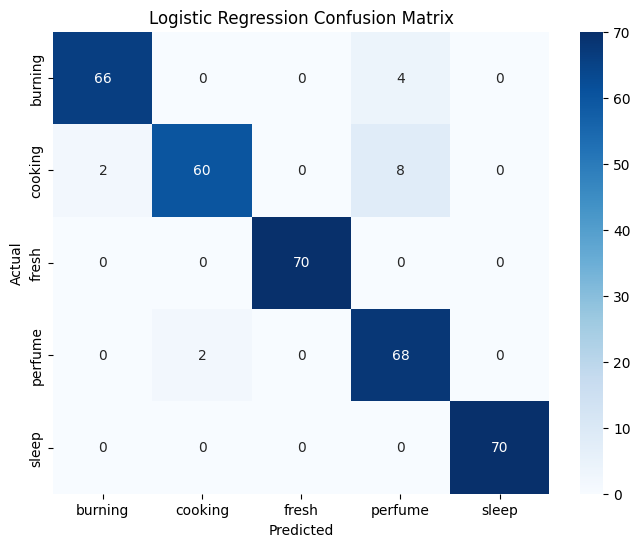

['fresh' 'perfume' 'burning' 'sleep' 'cooking' 'perfume' 'sleep' 'cooking'
 'perfume' 'burning' 'cooking' 'fresh' 'sleep' 'sleep' 'cooking' 'perfume'
 'cooking' 'fresh' 'sleep' 'burning' 'fresh' 'burning' 'sleep' 'cooking'
 'sleep' 'burning' 'perfume' 'sleep' 'cooking' 'fresh' 'burning' 'sleep'
 'sleep' 'fresh' 'fresh' 'cooking' 'fresh' 'cooking' 'cooking' 'cooking'
 'perfume' 'fresh' 'sleep' 'cooking' 'cooking' 'sleep' 'perfume' 'cooking'
 'burning' 'perfume' 'sleep' 'burning' 'burning' 'burning' 'perfume'
 'fresh' 'fresh' 'burning' 'perfume' 'burning' 'cooking' 'fresh' 'burning'
 'cooking' 'cooking' 'burning' 'sleep' 'fresh' 'perfume' 'perfume'
 'perfume' 'perfume' 'sleep' 'sleep' 'cooking' 'sleep' 'sleep' 'fresh'
 'cooking' 'cooking' 'cooking' 'perfume' 'fresh' 'sleep' 'fresh' 'perfume'
 'burning' 'burning' 'perfume' 'fresh' 'perfume' 'burning' 'perfume'
 'burning' 'cooking' 'cooking' 'burning' 'perfume' 'burning' 'perfume'
 'perfume' 'burning' 'cooking' 'sleep' 'sleep' 'burning' 'p

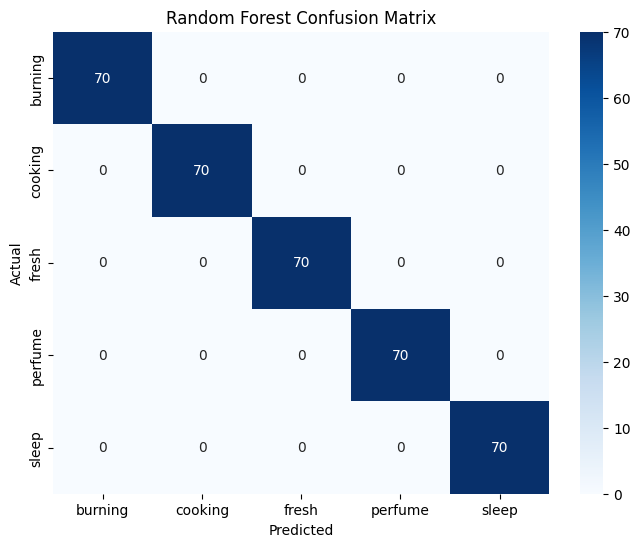

['fresh' 'perfume' 'burning' 'sleep' 'cooking' 'perfume' 'sleep' 'cooking'
 'perfume' 'burning' 'cooking' 'fresh' 'sleep' 'sleep' 'cooking' 'perfume'
 'cooking' 'fresh' 'sleep' 'burning' 'fresh' 'burning' 'sleep' 'cooking'
 'sleep' 'burning' 'perfume' 'sleep' 'cooking' 'fresh' 'burning' 'sleep'
 'sleep' 'fresh' 'fresh' 'cooking' 'fresh' 'cooking' 'cooking' 'cooking'
 'perfume' 'fresh' 'sleep' 'cooking' 'cooking' 'sleep' 'perfume' 'cooking'
 'burning' 'perfume' 'sleep' 'burning' 'burning' 'burning' 'perfume'
 'fresh' 'fresh' 'burning' 'perfume' 'burning' 'cooking' 'fresh' 'burning'
 'cooking' 'cooking' 'burning' 'sleep' 'fresh' 'perfume' 'perfume'
 'burning' 'perfume' 'sleep' 'sleep' 'cooking' 'sleep' 'sleep' 'fresh'
 'cooking' 'cooking' 'cooking' 'perfume' 'fresh' 'sleep' 'fresh' 'perfume'
 'burning' 'burning' 'perfume' 'fresh' 'perfume' 'burning' 'perfume'
 'burning' 'cooking' 'cooking' 'burning' 'perfume' 'burning' 'perfume'
 'perfume' 'burning' 'cooking' 'sleep' 'sleep' 'burning' 'p

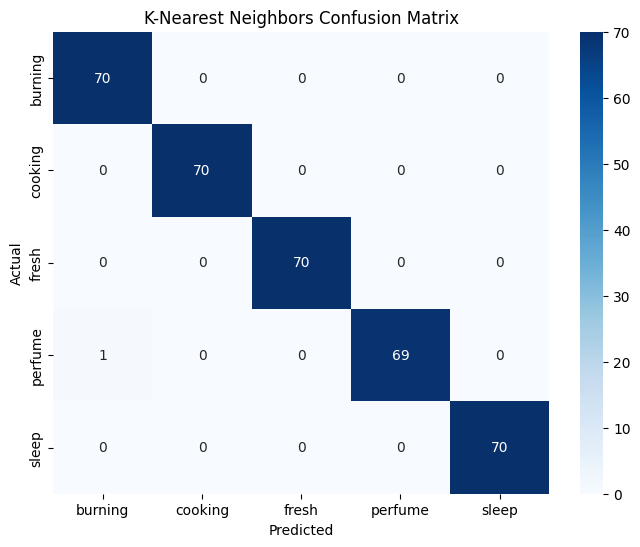

['fresh' 'perfume' 'perfume' 'sleep' 'cooking' 'perfume' 'sleep' 'cooking'
 'perfume' 'burning' 'cooking' 'fresh' 'sleep' 'sleep' 'cooking' 'perfume'
 'cooking' 'fresh' 'sleep' 'burning' 'fresh' 'burning' 'sleep' 'cooking'
 'sleep' 'burning' 'perfume' 'sleep' 'cooking' 'fresh' 'burning' 'sleep'
 'sleep' 'fresh' 'fresh' 'cooking' 'fresh' 'cooking' 'cooking' 'cooking'
 'perfume' 'fresh' 'sleep' 'cooking' 'cooking' 'sleep' 'perfume' 'cooking'
 'perfume' 'perfume' 'sleep' 'burning' 'burning' 'burning' 'perfume'
 'fresh' 'fresh' 'burning' 'perfume' 'burning' 'cooking' 'fresh' 'burning'
 'cooking' 'cooking' 'burning' 'sleep' 'fresh' 'perfume' 'perfume'
 'perfume' 'perfume' 'sleep' 'sleep' 'cooking' 'sleep' 'sleep' 'fresh'
 'cooking' 'cooking' 'cooking' 'perfume' 'fresh' 'sleep' 'fresh' 'perfume'
 'burning' 'burning' 'perfume' 'fresh' 'perfume' 'burning' 'perfume'
 'burning' 'cooking' 'cooking' 'burning' 'perfume' 'burning' 'perfume'
 'burning' 'burning' 'cooking' 'sleep' 'sleep' 'burning' 'p

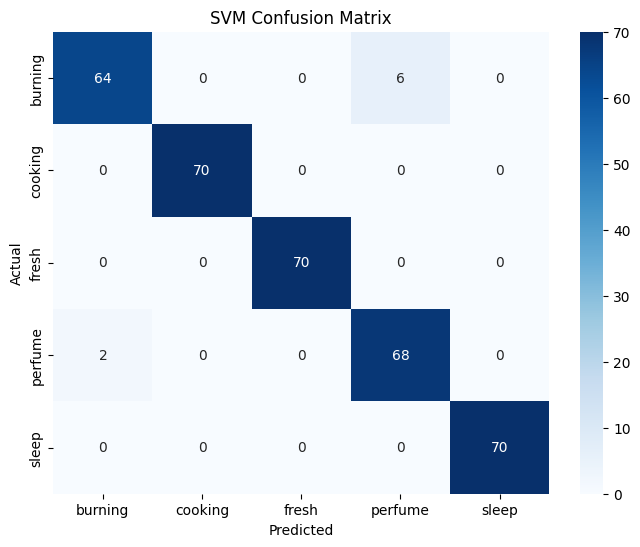

['fresh' 'perfume' 'burning' 'sleep' 'cooking' 'perfume' 'sleep' 'cooking'
 'perfume' 'burning' 'cooking' 'fresh' 'sleep' 'sleep' 'cooking' 'perfume'
 'cooking' 'fresh' 'sleep' 'burning' 'fresh' 'burning' 'sleep' 'cooking'
 'sleep' 'burning' 'perfume' 'sleep' 'cooking' 'fresh' 'burning' 'sleep'
 'sleep' 'fresh' 'fresh' 'cooking' 'fresh' 'cooking' 'cooking' 'cooking'
 'perfume' 'fresh' 'sleep' 'cooking' 'cooking' 'sleep' 'perfume' 'cooking'
 'burning' 'perfume' 'sleep' 'burning' 'burning' 'burning' 'perfume'
 'fresh' 'fresh' 'burning' 'perfume' 'burning' 'cooking' 'fresh' 'burning'
 'cooking' 'cooking' 'burning' 'sleep' 'fresh' 'perfume' 'perfume'
 'perfume' 'perfume' 'sleep' 'sleep' 'cooking' 'sleep' 'sleep' 'fresh'
 'cooking' 'cooking' 'cooking' 'perfume' 'fresh' 'sleep' 'fresh' 'perfume'
 'burning' 'burning' 'perfume' 'fresh' 'perfume' 'burning' 'perfume'
 'burning' 'cooking' 'cooking' 'burning' 'perfume' 'burning' 'perfume'
 'perfume' 'burning' 'cooking' 'sleep' 'sleep' 'burning' 'p

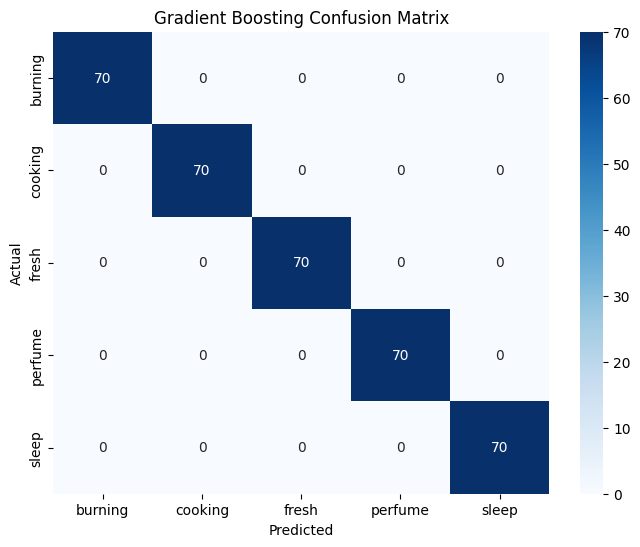

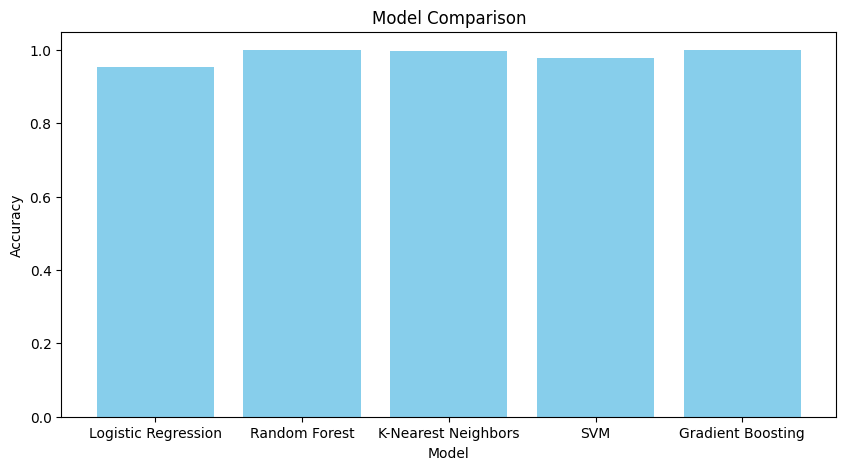

In [ ]:
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    if model_name== 'Random Forest':
      dump(model, 'random_forest_model.joblib')
    y_pred = model.predict(X_test)
    print(y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    results[model_name] = accuracy

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plt.figure(figsize=(10, 5))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.title('Model Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

Data Plots

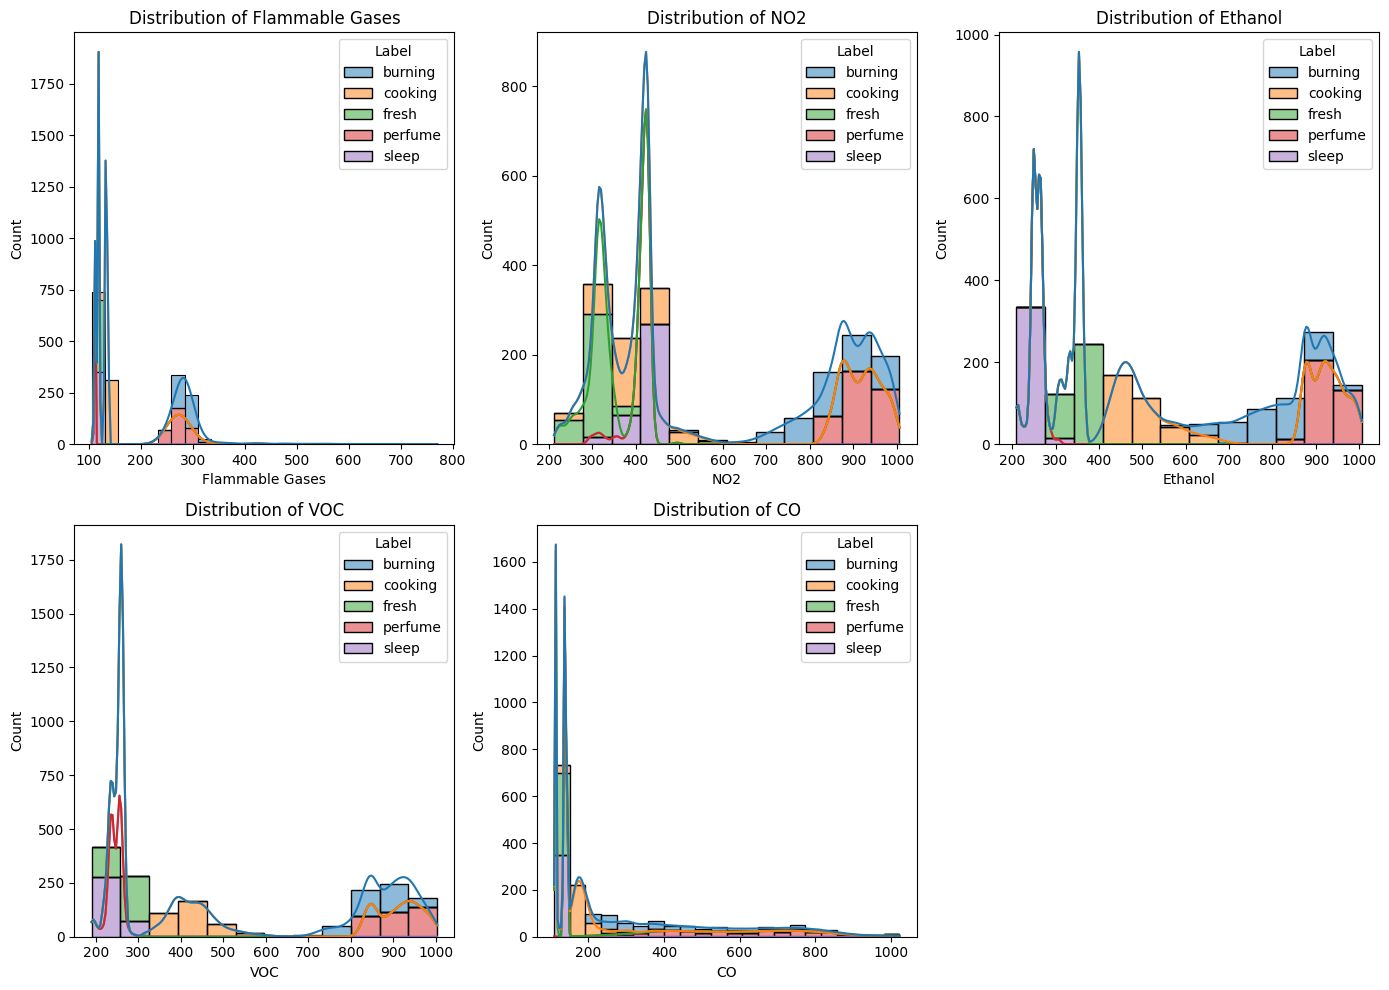

In [ ]:
plt.figure(figsize=(14, 10))
for i, gas in enumerate(['Flammable Gases', 'NO2', 'Ethanol', 'VOC', 'CO']):
    plt.subplot(2, 3, i + 1)
    sns.histplot(data=sampled_data, x=gas, hue='Label', multiple="stack", kde=True)
    plt.title(f'Distribution of {gas}')
plt.tight_layout()
plt.show()

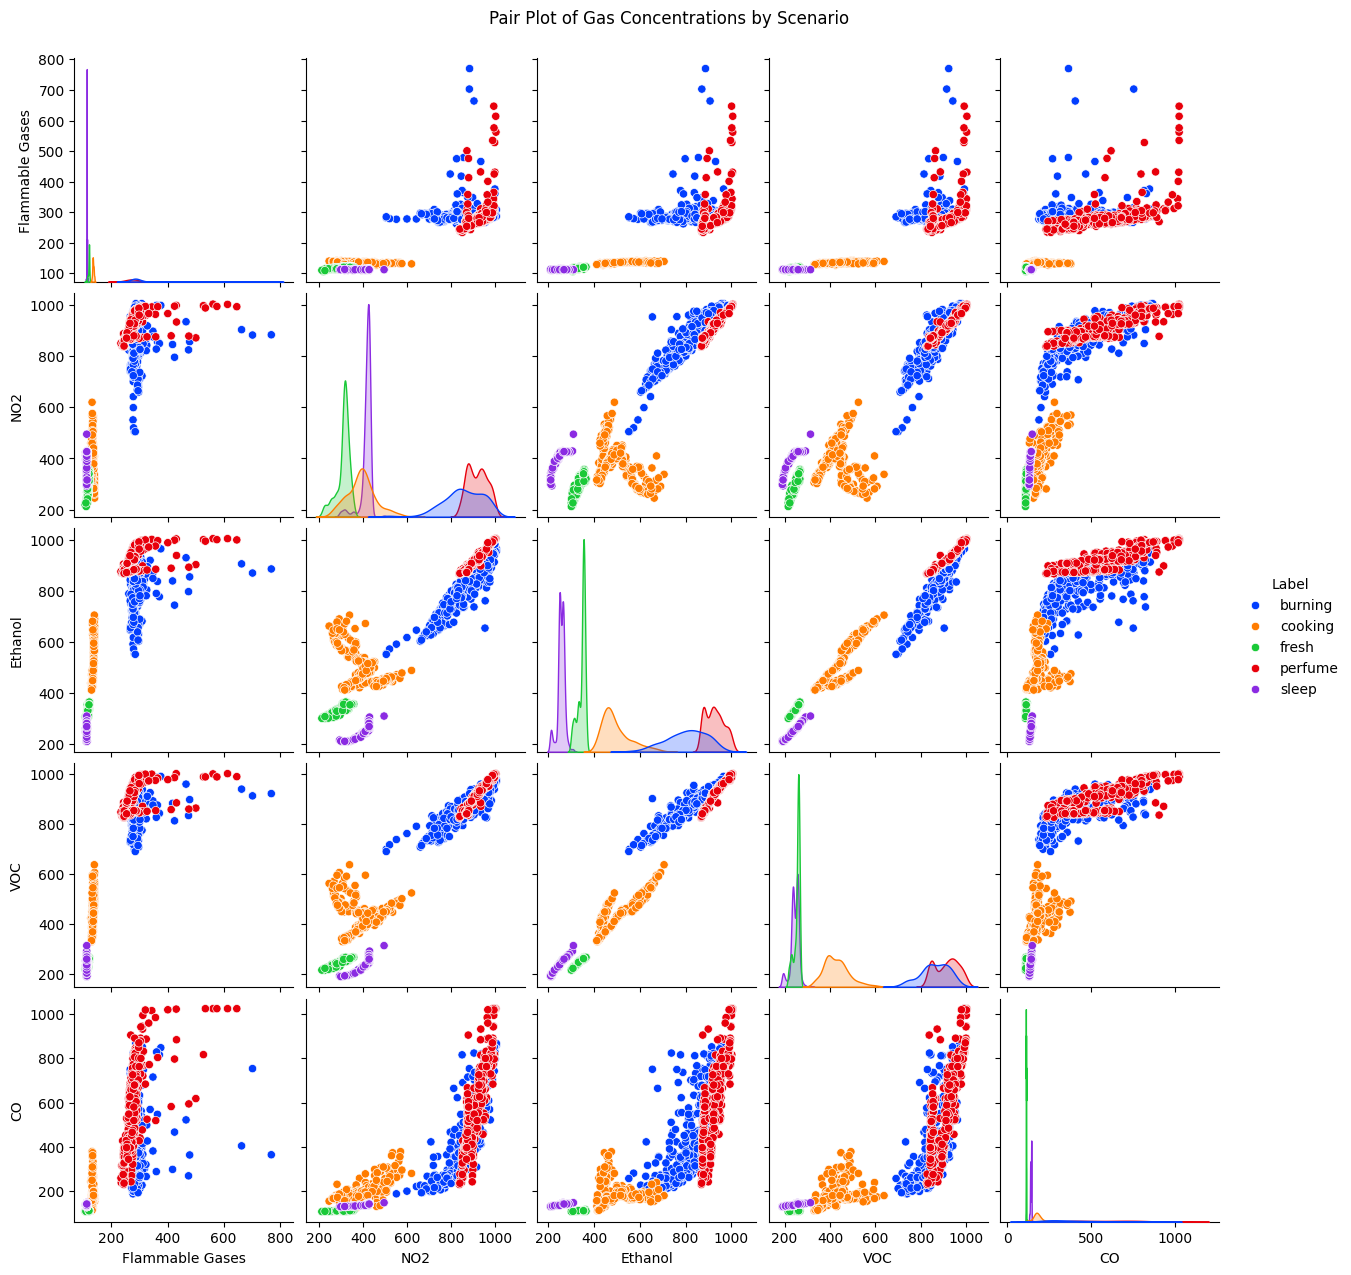

In [ ]:
sns.pairplot(sampled_data, hue='Label', palette="bright", diag_kind="kde")
plt.suptitle('Pair Plot of Gas Concentrations by Scenario', y=1.02)
plt.show()

<ipython-input-12-3a1e5cdb7909>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sampled_data, x='Label', y=gas, palette="Set3")
<ipython-input-12-3a1e5cdb7909>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sampled_data, x='Label', y=gas, palette="Set3")
<ipython-input-12-3a1e5cdb7909>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sampled_data, x='Label', y=gas, palette="Set3")
<ipython-input-12-3a1e5cdb7909>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assig

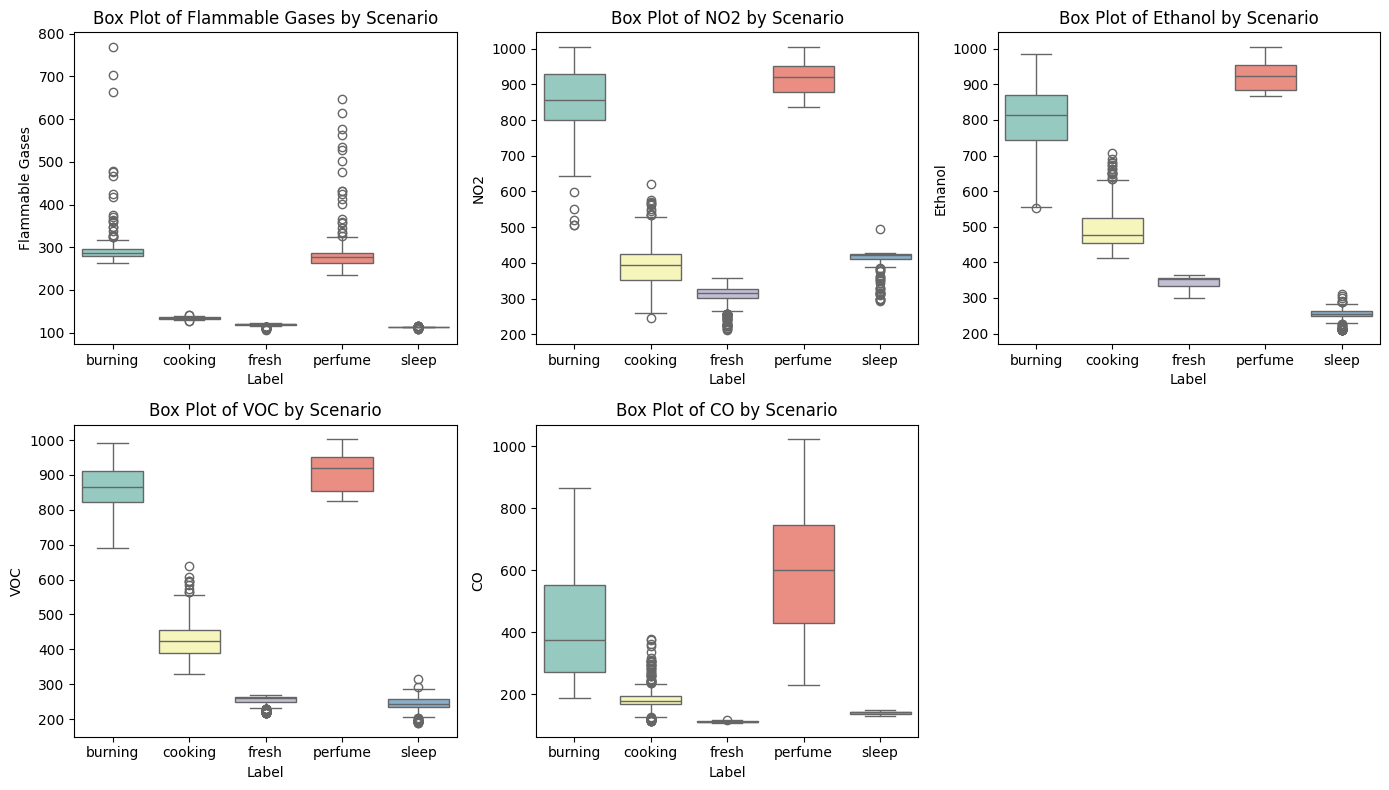

In [ ]:
# Box Plot to see distribution and outliers in each gas concentration per scenario
plt.figure(figsize=(14, 8))
for i, gas in enumerate(['Flammable Gases', 'NO2', 'Ethanol', 'VOC', 'CO']):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=sampled_data, x='Label', y=gas, palette="Set3")
    plt.title(f'Box Plot of {gas} by Scenario')
plt.tight_layout()
plt.show()

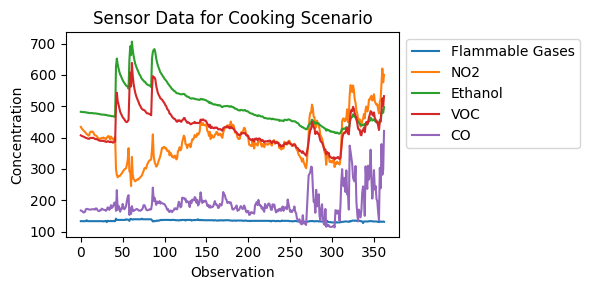

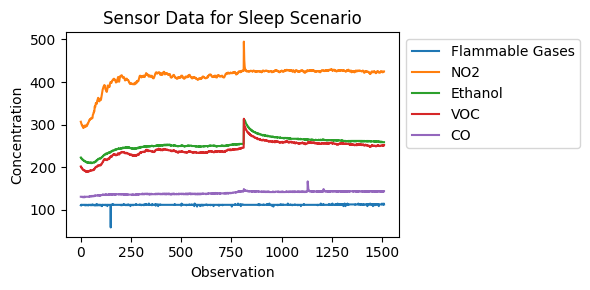

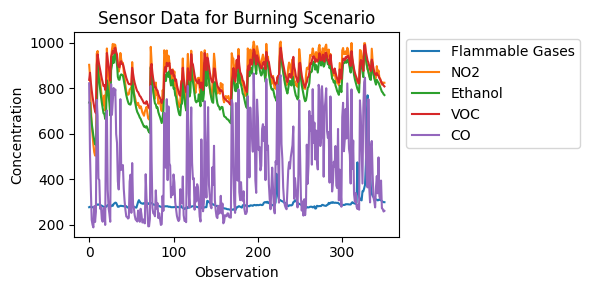

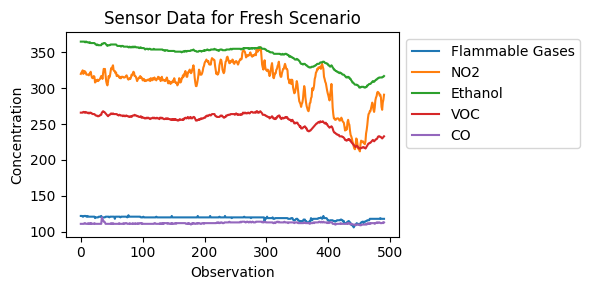

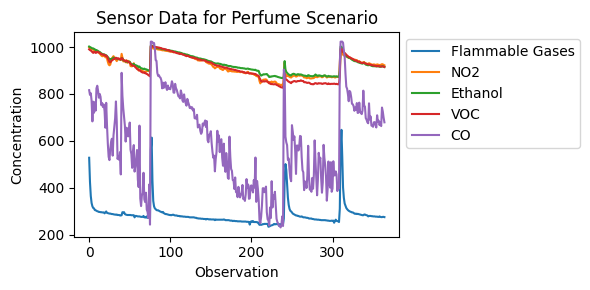

In [ ]:
# Plot line plots for each scenario
def plot_sensor_data(data, scenario_name):
    plt.figure(figsize=(6, 3))
    gases = ['Flammable Gases', 'NO2', 'Ethanol', 'VOC', 'CO']
    for gas in gases:
        plt.plot(data.index, data[gas], label=gas)
    plt.title(f'Sensor Data for {scenario_name.capitalize()} Scenario')
    plt.xlabel('Observation')
    plt.ylabel('Concentration')

    # Adjust legend position
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Move legend outside the plot
    plt.tight_layout()  # Adjust layout to make space for the legend
    plt.show()

# Create line plots for each scenario
scenarios = {
    'cooking': cooking.reset_index(drop=True),
    'sleep': sleep.reset_index(drop=True),
    'burning': burning.reset_index(drop=True),
    'fresh': fresh.reset_index(drop=True),
    'perfume': perfume.reset_index(drop=True)
}

for scenario_name, data in scenarios.items():
    plot_sensor_data(data, scenario_name)


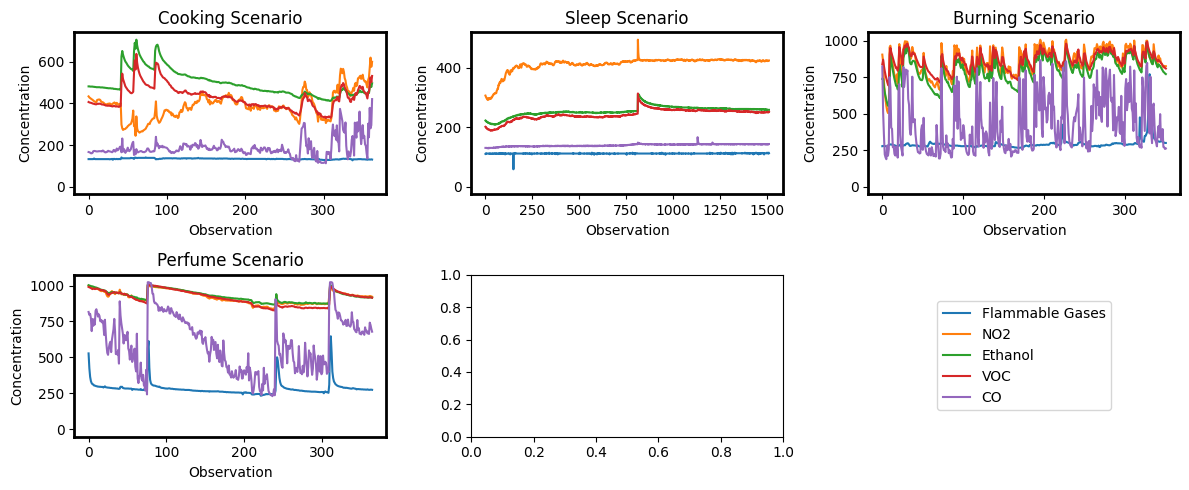

In [ ]:
import matplotlib.patches as patches

# Plot line plots for all scenarios in one figure with a common legend
def plot_all_scenarios(scenarios):
    fig, axs = plt.subplots(2, 3, figsize=(12, 5))  # Create a 3x2 grid of subplots
    axs = axs.flatten()  # Flatten the 2D array of axes to 1D for easy indexing

    gases = ['Flammable Gases', 'NO2', 'Ethanol', 'VOC', 'CO']

    for i, (scenario_name, data) in enumerate(scenarios.items()):
        for gas in gases:
            axs[i].plot(data.index, data[gas], label=gas)
        axs[i].set_title(f'{scenario_name.capitalize()} Scenario')
        axs[i].set_xlabel('Observation')
        axs[i].set_ylabel('Concentration')

        # Draw a black border around each subplot
        for spine in axs[i].spines.values():
            spine.set_color('black')  # Set the color of the spine
            spine.set_linewidth(2)  # Set the width of the spine

        # Create separators between the subplots
        if i % 3 != 2:  # Avoid the last column
            axs[i].add_patch(patches.Rectangle((1.05, 0), 0.01, 1, color='black', transform=axs[i].transAxes))

        if i < 3:  # For the top row, avoid adding to the last row
            axs[i].add_patch(patches.Rectangle((0, -0.1), 1, 0.01, color='black', transform=axs[i].transAxes))

    # Hide the last subplot to keep it as empty
    axs[-1].axis('off')  # Hide the last axis

    # Add a common legend in the empty subplot space
    handles, labels = axs[0].get_legend_handles_labels()  # Get handles and labels from the first subplot
    axs[-1].legend(handles, labels, loc='center', fontsize='medium')  # Place legend in the center of the last subplot

    plt.subplots_adjust(hspace=0.5, wspace=0.5)  # Adjust the space between subplots
    plt.tight_layout()  # Adjust layout to fit all elements properly
    plt.show()

# Create line plots for each scenario
scenarios = {
    'cooking': cooking.reset_index(drop=True),
    'sleep': sleep.reset_index(drop=True),
    'burning': burning.reset_index(drop=True),
    # 'fresh air': fresh.reset_index(drop=True),
    'perfume': perfume.reset_index(drop=True)
}

# Call the function to plot all scenarios
plot_all_scenarios(scenarios)

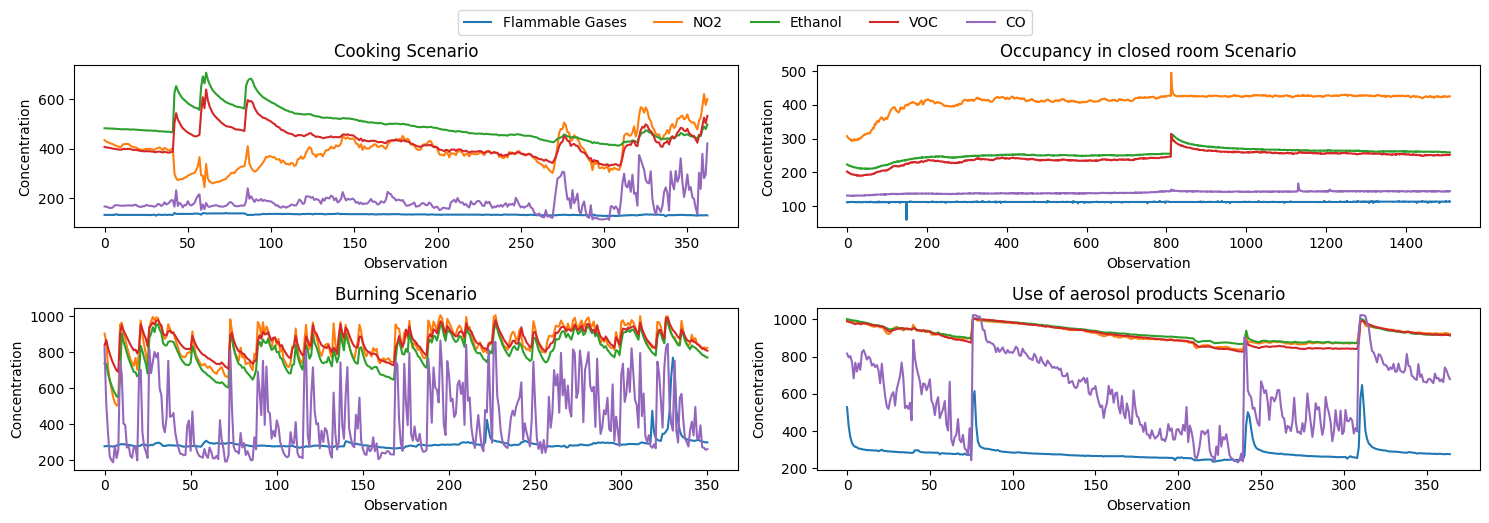

In [ ]:
# Plot line plots for all scenarios in one figure with a common legend
def plot_all_scenarios(scenarios):
    fig, axs = plt.subplots(2, 2, figsize=(15, 5))  # Create a 2x3 grid of subplots
    axs = axs.flatten()  # Flatten the 2D array of axes to 1D for easy indexing

    gases = ['Flammable Gases', 'NO2', 'Ethanol', 'VOC', 'CO']

    for i, (scenario_name, data) in enumerate(scenarios.items()):
          for gas in gases:
              axs[i].plot(data.index, data[gas], label=gas)
          axs[i].set_title(f'{scenario_name.capitalize()} Scenario')
          axs[i].set_xlabel('Observation')
          axs[i].set_ylabel('Concentration')


    # Add a common legend outside the plots in the last subplot's position
    handles, labels = axs[0].get_legend_handles_labels()  # Get handles and labels from the first subplot
    fig.legend(handles, labels, loc='upper center', ncol=len(gases), fontsize='medium', bbox_to_anchor=(0.5, 1.05))

    plt.tight_layout()
    plt.show()

# Create line plots for each scenario
scenarios = {
    'cooking': cooking.reset_index(drop=True),
    'occupancy in closed room': sleep.reset_index(drop=True),
    'burning': burning.reset_index(drop=True),
    # 'fresh': fresh.reset_index(drop=True),
    'use of aerosol products': perfume.reset_index(drop=True)
}

# Call the function to plot all scenarios
plot_all_scenarios(scenarios)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, make_scorer
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [ ]:
# Model configurations
models = {
    'SVM_Linear': SVC(kernel='linear'),
    'SVM_Poly': SVC(kernel='poly', degree=3),
    'SVM_RBF': SVC(kernel='rbf'),
    'kNN_10': KNeighborsClassifier(n_neighbors=10),
    'kNN_20': KNeighborsClassifier(n_neighbors=20),
    'kNN_30': KNeighborsClassifier(n_neighbors=30),
    'Logistic_Regression': LogisticRegression(),
    'Random_Forest_30_10': RandomForestClassifier(n_estimators=30, max_depth=10),
    'Random_Forest_50_10': RandomForestClassifier(n_estimators=50, max_depth=10),
}

# Metrics collection
results = []

for name, model in models.items():
    # Training on 80-20 split
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_metrics = precision_recall_fscore_support(y_train, y_train_pred, average='weighted')
    test_metrics = precision_recall_fscore_support(y_test, y_test_pred, average='weighted')
    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)

    # 5-Fold Cross-Validation
    cv_results = cross_validate(model, X, y, cv=5, scoring=['accuracy'], return_train_score=True)
    accuracy_mean_train = np.mean(cv_results['train_accuracy'])
    accuracy_mean_test = np.mean(cv_results['test_accuracy'])
    accuracy_std_train = np.std(cv_results['train_accuracy'])
    accuracy_std_test = np.std(cv_results['test_accuracy'])

    results.append({
        'Model': name,
        'Train_F1': train_metrics[2],
        'Train_Precision': train_metrics[0],
        'Train_Recall': train_metrics[1],
        'Test_F1': test_metrics[2],
        'Test_Precision': test_metrics[0],
        'Test_Recall': test_metrics[1],
        'CV_Train_Accuracy_Mean': accuracy_mean_train,
        'CV_Test_Accuracy_Mean': accuracy_mean_test,
        'CV_Train_Accuracy_Std': accuracy_std_train,
        'CV_Test_Accuracy_Std': accuracy_std_test
    })



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
# Convert results to DataFrame for easy viewing and exporting
results_df = pd.DataFrame(results)
print(results_df)

# Optional: Export to CSV
results_df.to_csv("model_performance.csv", index=False)

                 Model  Train_F1  Train_Precision  Train_Recall   Test_F1  \
0           SVM_Linear  1.000000         1.000000      1.000000  0.997143   
1             SVM_Poly  0.999286         0.999288      0.999286  1.000000   
2              SVM_RBF  0.969846         0.973542      0.970000  0.977124   
3               kNN_10  0.990712         0.990912      0.990714  0.997143   
4               kNN_20  0.983548         0.984610      0.983571  0.982826   
5               kNN_30  0.972757         0.975444      0.972857  0.974253   
6  Logistic_Regression  0.965038         0.966892      0.965000  0.959932   
7  Random_Forest_30_10  1.000000         1.000000      1.000000  1.000000   
8  Random_Forest_50_10  1.000000         1.000000      1.000000  1.000000   

   Test_Precision  Test_Recall  CV_Train_Accuracy_Mean  CV_Test_Accuracy_Mean  \
0        0.997183     0.997143                1.000000               0.998286   
1        1.000000     1.000000                0.999429             